In [58]:
import math
import numpy
from matplotlib import pyplot

In [59]:
N = 50                                 # number of points in each direction
x_start, x_end = -2.0, 2.0             # boundaries in the x-direction
y_start, y_end = -1.0, 1.0             # boundaries in the y-direction
x = numpy.linspace(x_start, x_end, N)     # creates a 1D-array with the x-direction
y = numpy.linspace(y_start, y_end, N)     # creates a 1D-array with the y-direction

print('x= ', x)
print('y= ', y)

X, Y = numpy.meshgrid(x, y)               # generate a mesh grid

x=  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y=  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26

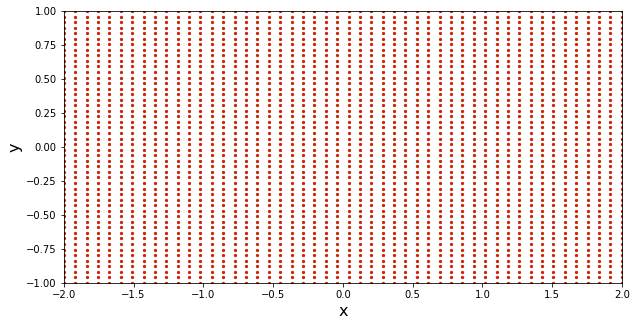

In [60]:
%matplotlib inline

# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o')

In [61]:
strength_source = 5.0                  # source strength
x_source, y_source = -1.0, 0.0         # location of the source

# compute the velocity field on the mesh grid
u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

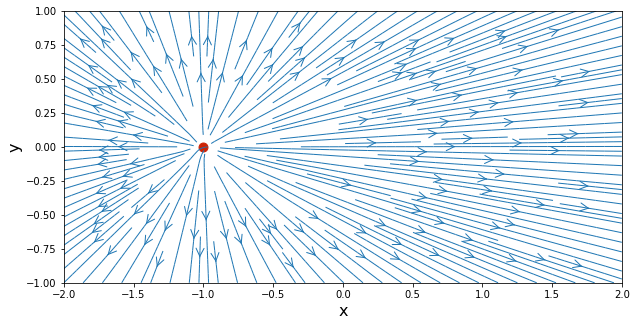

In [62]:
# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')

In [63]:
strength_sink = -5.0                   # strength of the sink
x_sink, y_sink = 1.0, 0.0              # location of the sink

# compute the velocity on the mesh grid
u_sink = (strength_sink / (2 * math.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (strength_sink / (2 * math.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

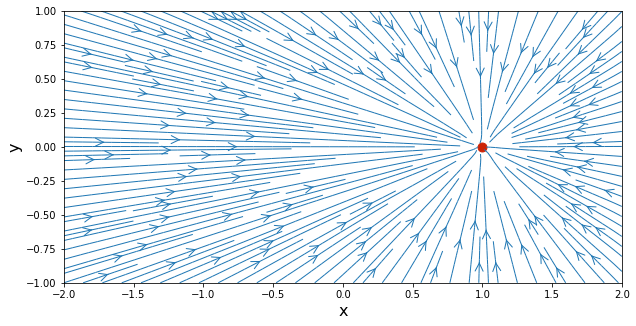

In [64]:
# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink,
               color='#CD2305', s=80, marker='o')

In [107]:
def get_velocity(strength, xs, ys, X, Y):
    u = (strength / (2 * math.pi) *
          (X - xs) / ((X - xs)**2 + (Y - ys)**2))
    v = (strength_sink / (2 * math.pi) *
          (Y - ys) / ((X - xs)**2 + (Y - ys)**2))
    return u, v

In [108]:
def get_stream_function(strength, xs, ys, X, Y):
    potential = numpy.log(((X - xs)**2 + (Y - ys)**2)**(1/2)) * strength / (2 * math.pi)
    return potential

In [109]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

In [110]:
potential_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

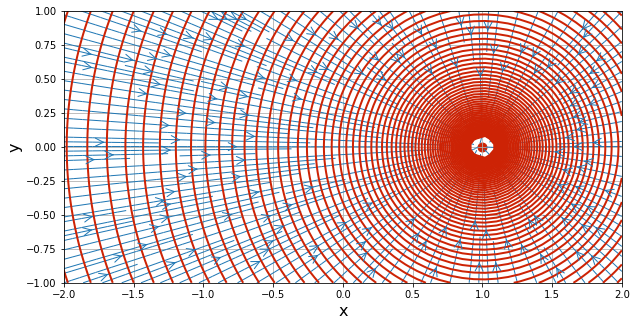

In [116]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, potential_sink,                
               levels=numpy.linspace(-2.0, 2.0, 100),extend='both',
               colors='#CD2305', linewidths=2, linestyles='solid');